___

# <font color= #8A0829> Challenge-MT3 Technology </font>
- <Strong> Sara Eugenia Rodríguez Reyes</Strong>
- <Strong> Email: </Strong>  <font color="blue"> `sara.eug.rod.rey@gmail.com` </font>
___


# <font color= #2E9AFE> Exercise 2: House Prices - Advanced Regression Techniques </font>


### Overview

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges to predict the final price of each home.

### The data

Data can be found in:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

**Data Fields**

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.kaggle.com/static/images/site-logo.svg" width="250px" height="80px" />

In [1]:
#Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#Selección de variables
from sklearn.feature_selection import RFE

#regresión lineal
from sklearn.linear_model import LinearRegression
#Ridge
from sklearn.linear_model import Ridge
#Bosque aleatorio
from sklearn.ensemble import RandomForestRegressor
#Maquina de Vector Soporte (SVR)
from sklearn.svm import SVR
#XGboost
import xgboost as xgb

#métricas de performance
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error

#Cross validation y train-test split
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, KFold

#Grid Search
from sklearn.model_selection import GridSearchCV

In [2]:
def reporte(datos):
    dtyp = pd.DataFrame(datos.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(datos.isnull().sum(), columns=['Valores_Nulos'])
    unival = pd.DataFrame(datos.nunique(), columns=['Valores_Unicos'])
    maximo = pd.DataFrame(datos.max(), columns=['Max'])
    minimo = pd.DataFrame(datos.min(), columns=['Min'])
    return dtyp.join(missing).join(unival).join(maximo).join(minimo)


### First Ideas

Data is labeled and target variable is numerical, therefore is a Regression Supervised Learning problem

In [3]:
#load data
houses_train = pd.read_csv('train_houses.csv')
houses_test = pd.read_csv('test_houses.csv')

## <font color= 'green'> Exploratory Data Analysis </font>

### Test File

In [4]:
houses_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
houses_test.shape

(1459, 80)

### Train File

In [6]:
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
houses_train.shape

(1460, 81)

In [8]:
reporte(houses_train)

C:\Users\rodrigsa\AppData\Local\Temp\ipykernel_30148\3686451687.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maximo = pd.DataFrame(datos.max(), columns=['Max'])
C:\Users\rodrigsa\AppData\Local\Temp\ipykernel_30148\3686451687.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minimo = pd.DataFrame(datos.min(), columns=['Min'])


,Tipo,Valores_Nulos,Valores_Unicos,Max,Min
Id,int64,0,1460,1460,1
MSSubClass,int64,0,15,190,20
MSZoning,object,0,5,RM,C (all)
LotFrontage,float64,259,110,313.0,21.0
LotArea,int64,0,1073,215245,1300
...,...,...,...,...,...
MoSold,int64,0,12,12,1
YrSold,int64,0,5,2010,2006
SaleType,object,0,9,WD,COD
SaleCondition,object,0,6,Partial,Abnorml


At first glance I see that there are some "int" variables that should be "object":
- MSSubClass: as per the definition: The building class
- MoSold
- YrSold

In [9]:
#how many missing values are in the data
missing = pd.DataFrame(houses_train.isnull().sum(), columns=['Missing'])
missing['percentage']=missing.div(houses_train.shape[0])*100
missing[missing['Missing']>0]

,Missing,percentage
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


There are variables with lots of missing values, we could treat or delete the variable depending on the case

### Distribution of data

In [10]:
numerical = houses_train.select_dtypes(include=['int64', 'float64'])
categorical = houses_train.select_dtypes(exclude=['int64', 'float64'])

C:\Users\rodrigsa\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


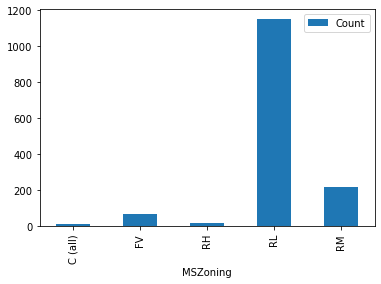

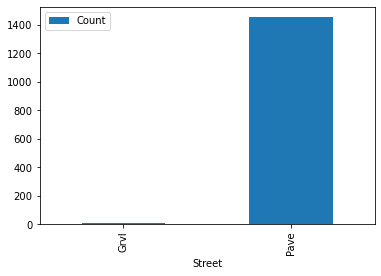

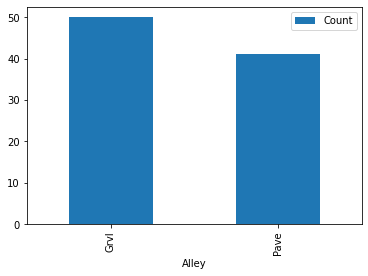

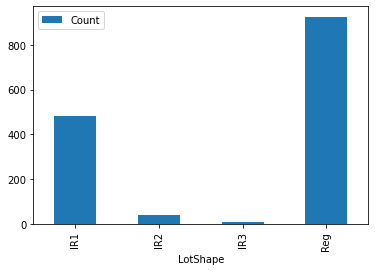

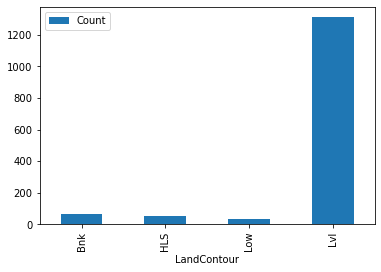

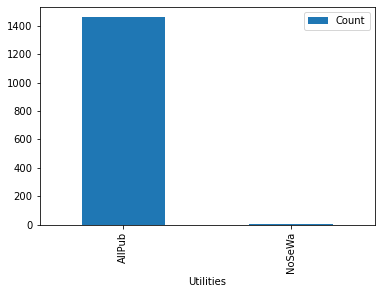

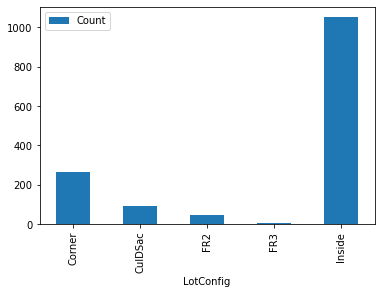

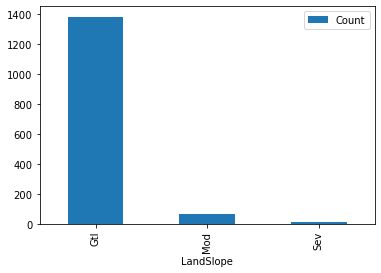

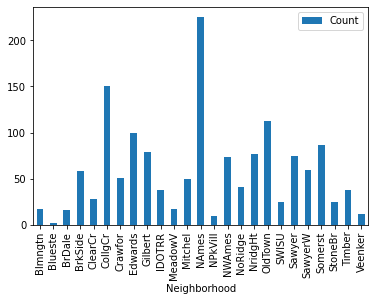

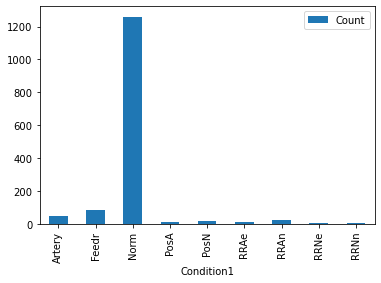

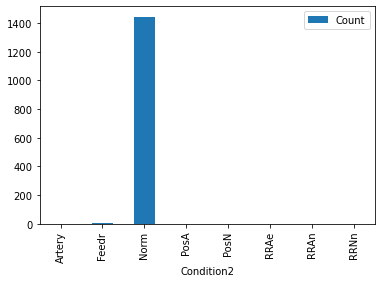

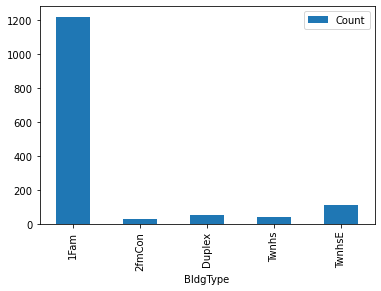

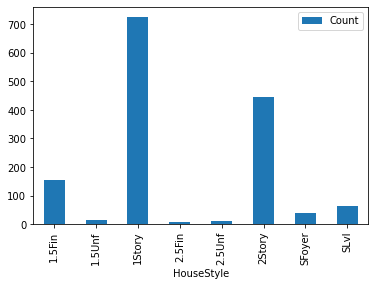

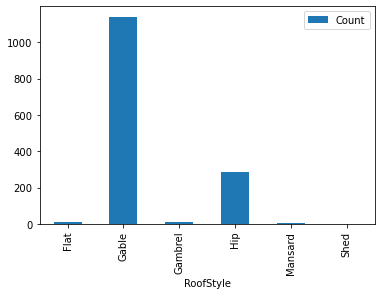

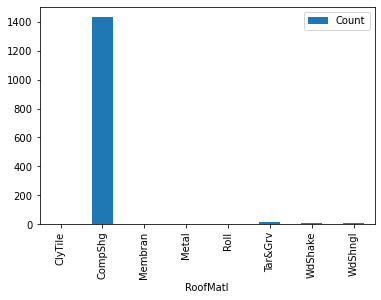

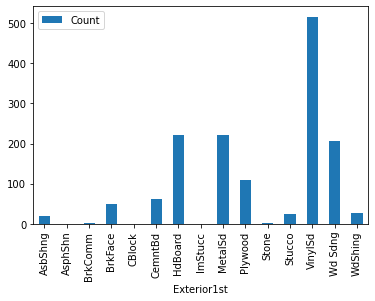

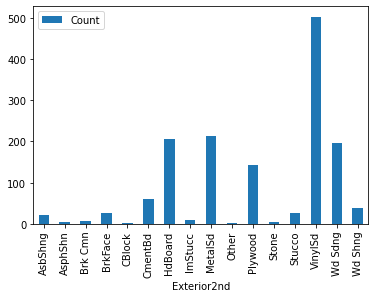

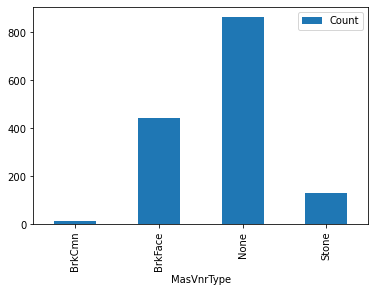

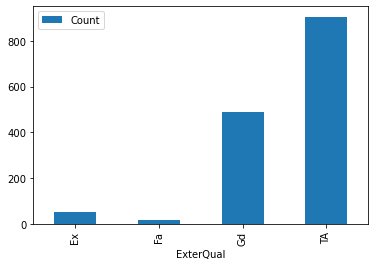

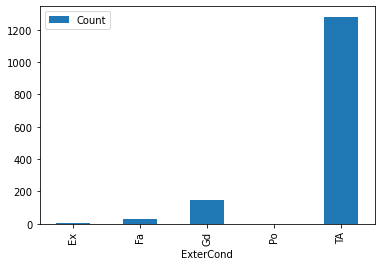

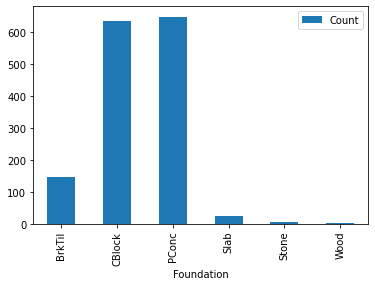

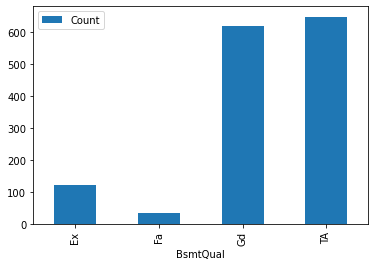

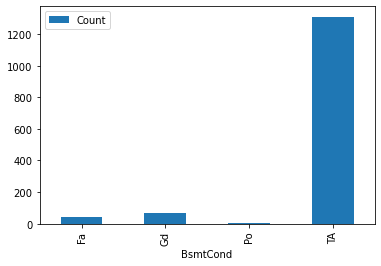

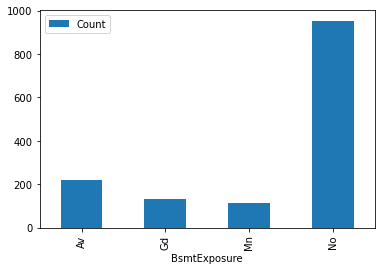

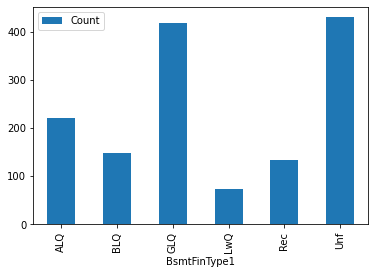

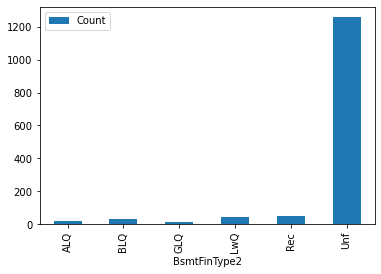

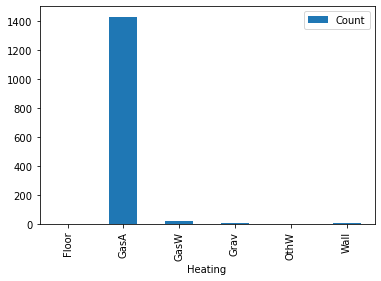

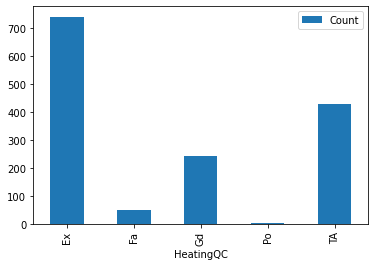

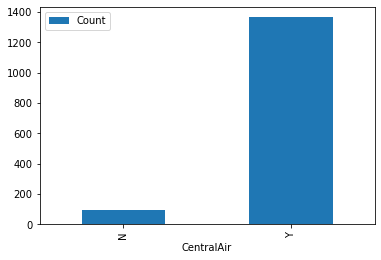

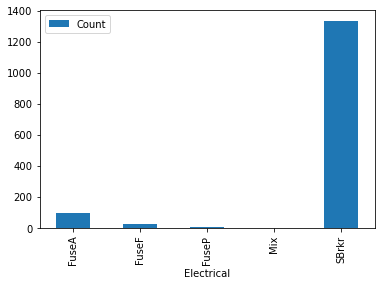

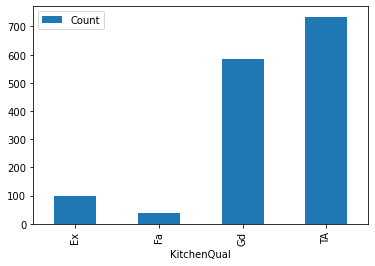

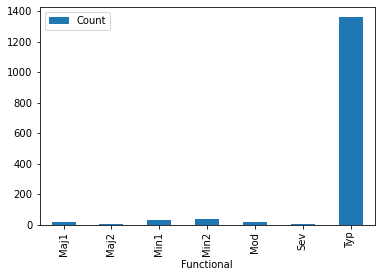

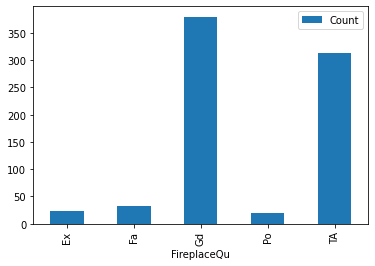

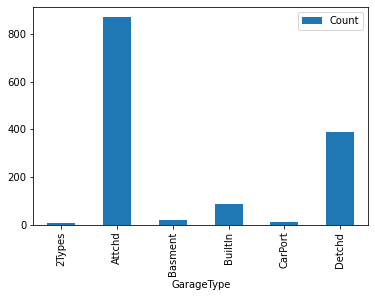

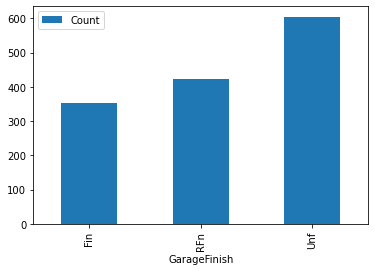

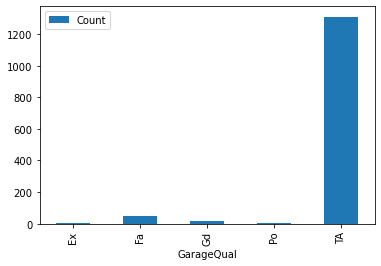

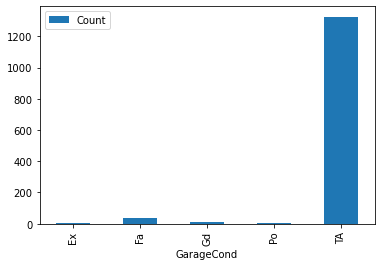

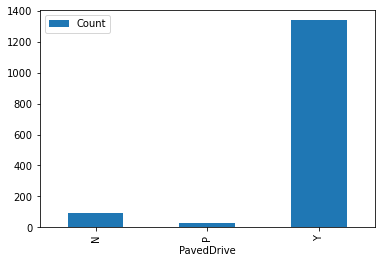

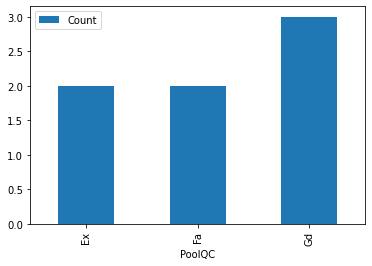

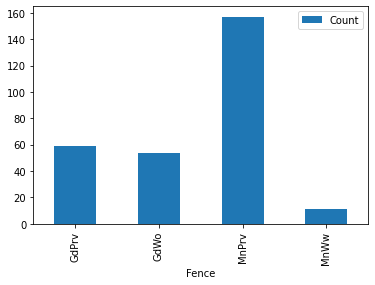

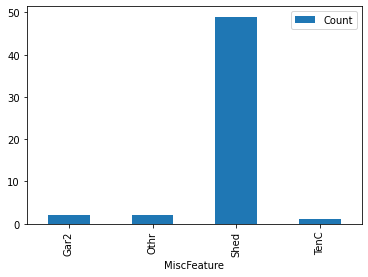

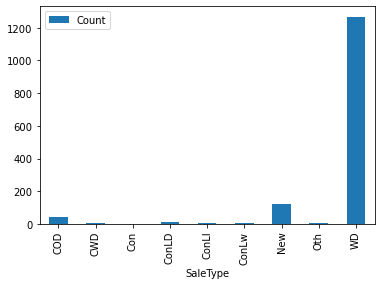

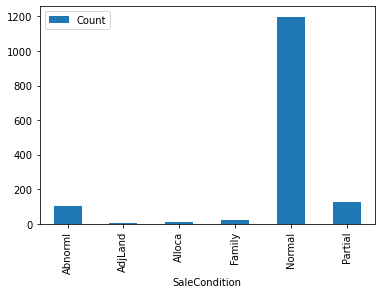

In [11]:
#categorical
tables = []
for col in categorical.columns:
    table = categorical.groupby([col]).size().reset_index().rename(columns={0 :'Count'} )
    tables.append(table)


for i in range(len(tables)):
    tables[i].plot(x=categorical.columns[i], y='Count', kind='bar')
    

Comments from the barplots:

- "Street" variable seem to have mostly only one category --> Pave (might not be helpful)

- "Utilities" variable seem to have mostly only one category --> AllPub  (might not be helpful)

- "MiscFeature" variable seem to have mostly only one category --> Shed (might not be helpful)

C:\Users\rodrigsa\AppData\Local\Temp\ipykernel_30148\1430414373.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,5))


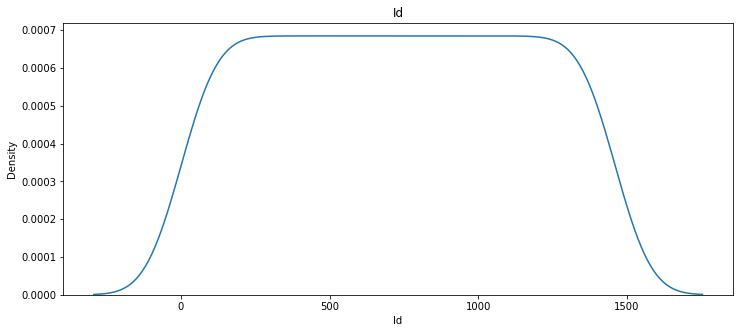

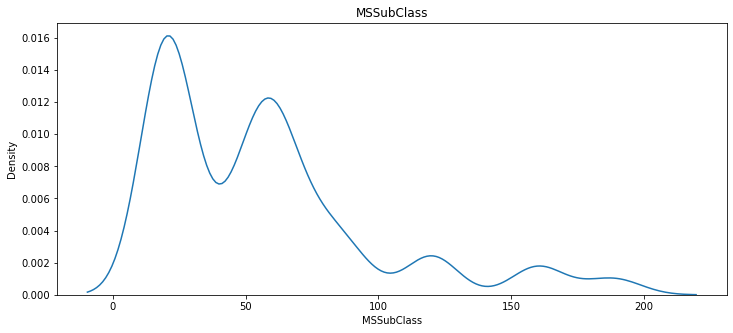

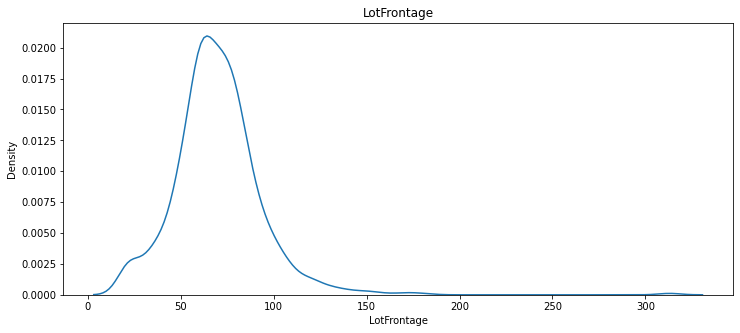

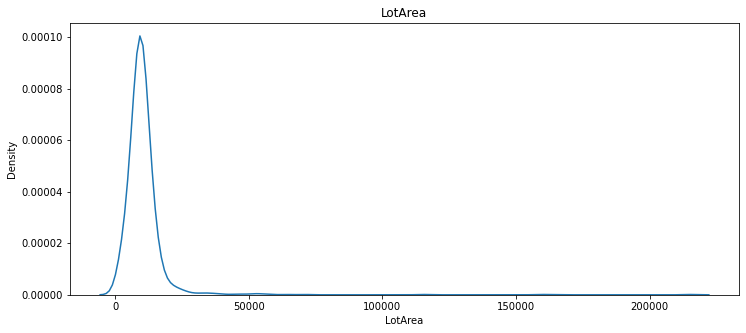

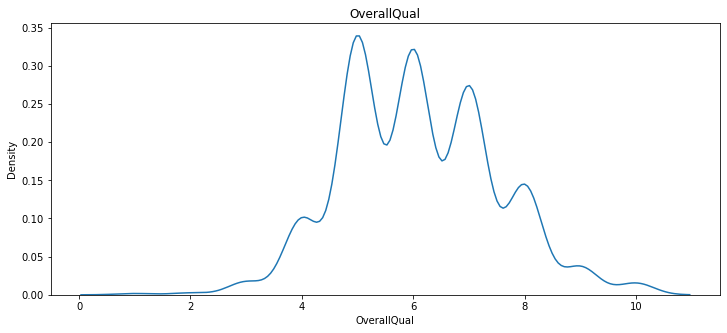

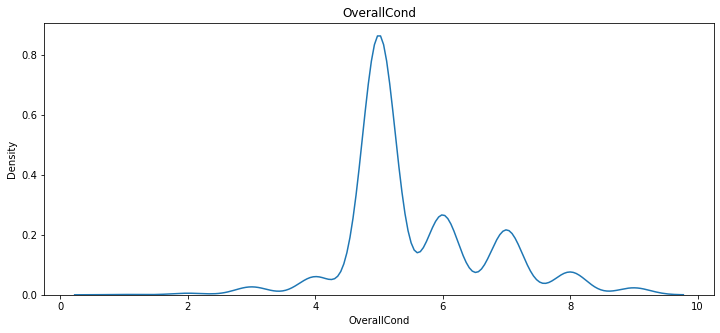

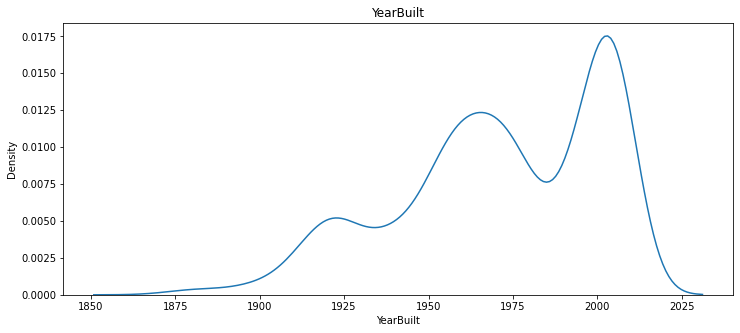

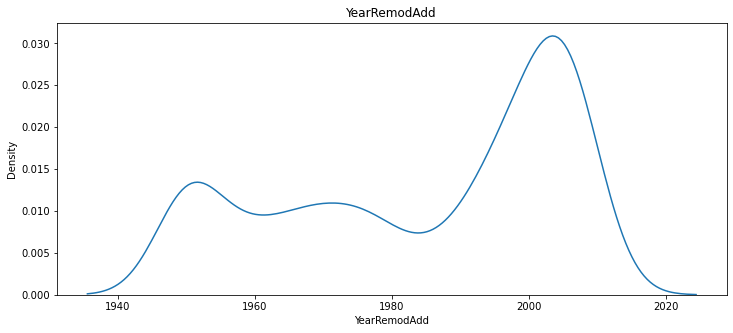

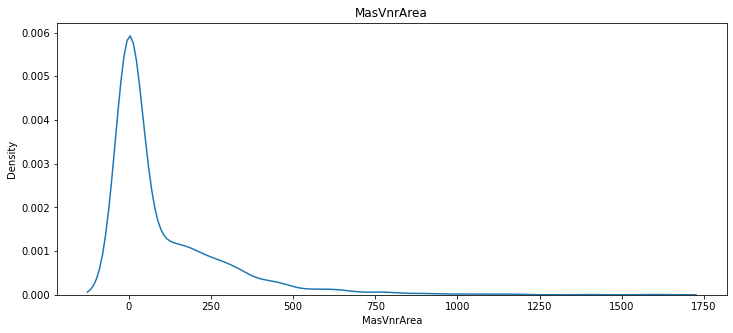

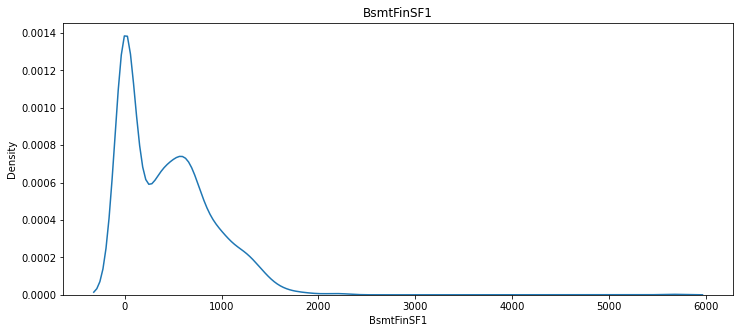

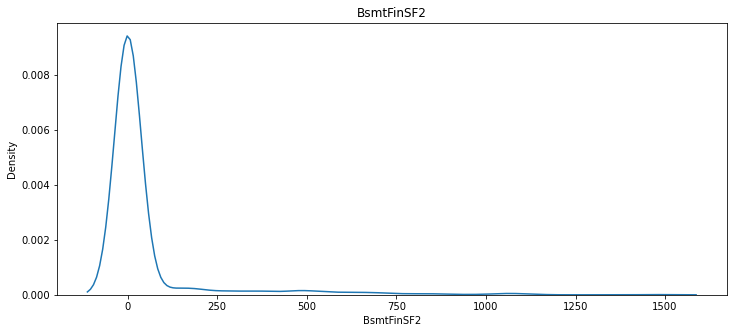

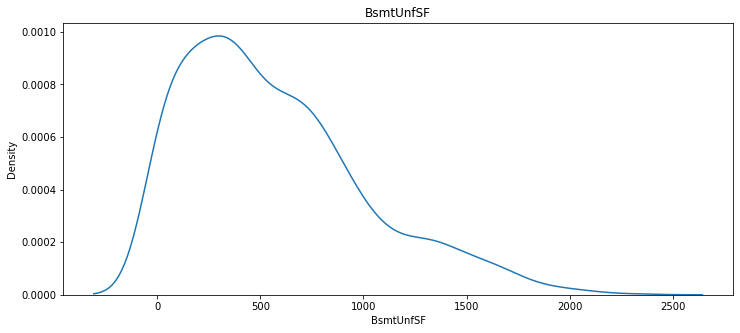

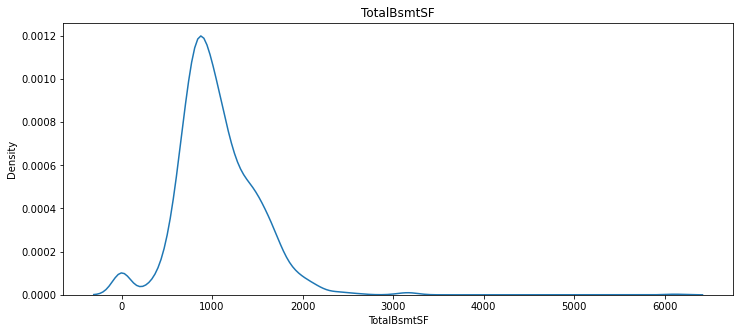

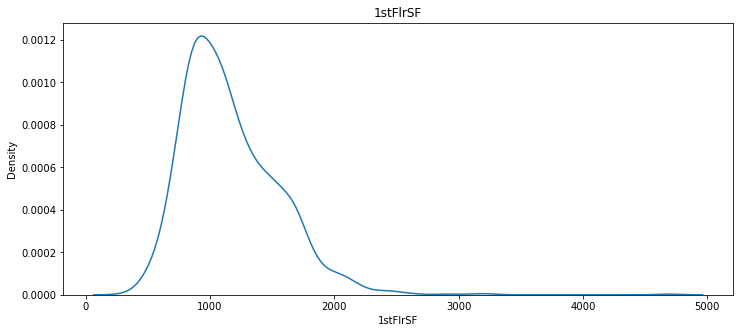

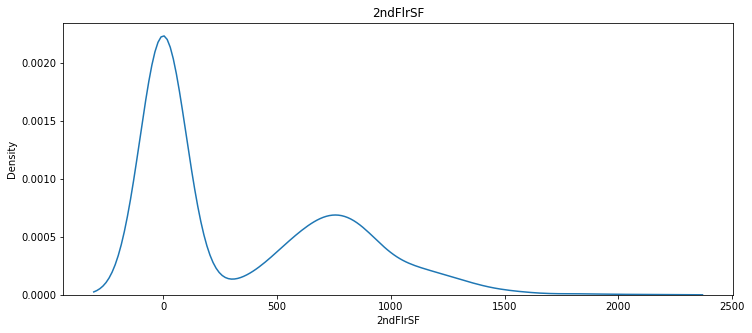

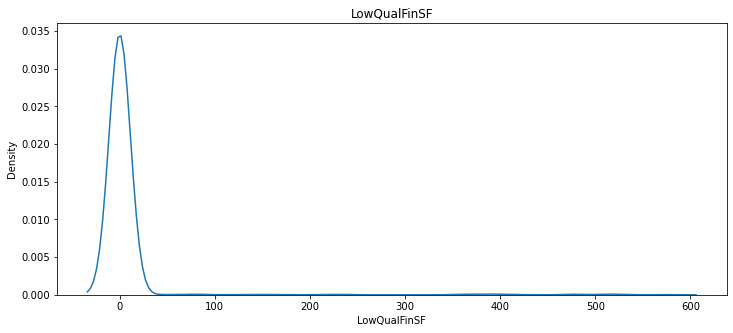

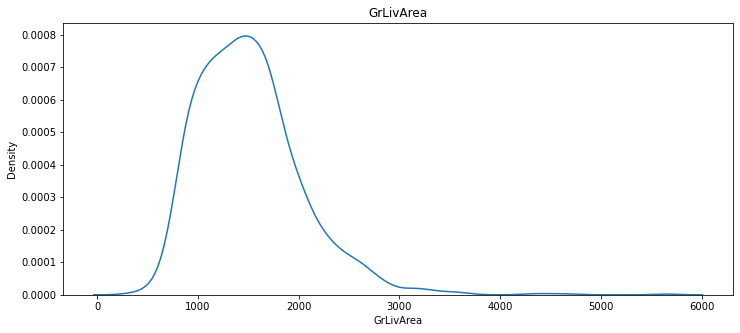

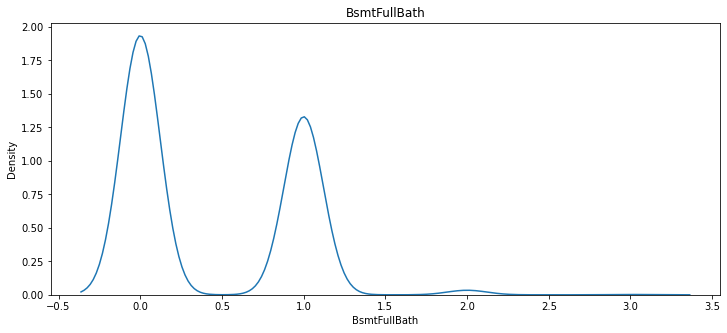

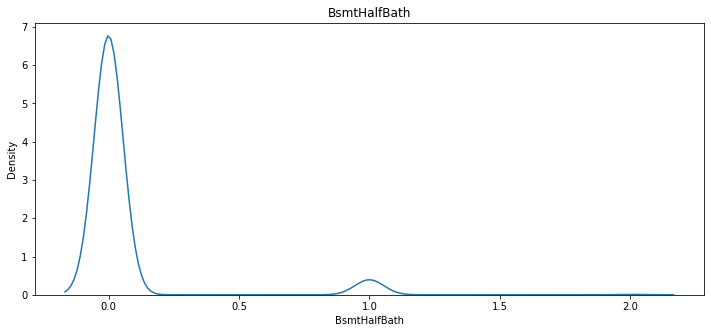

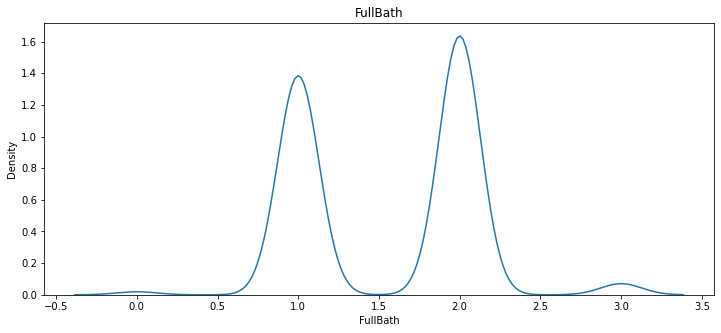

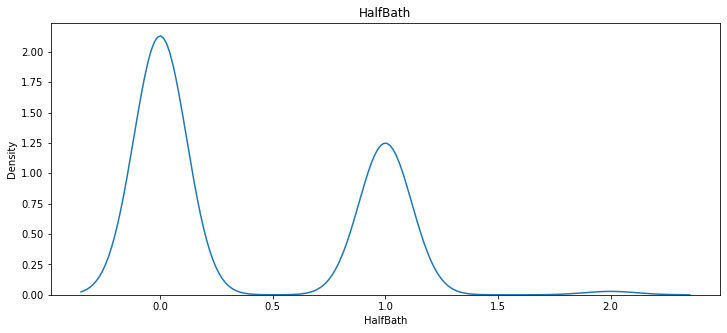

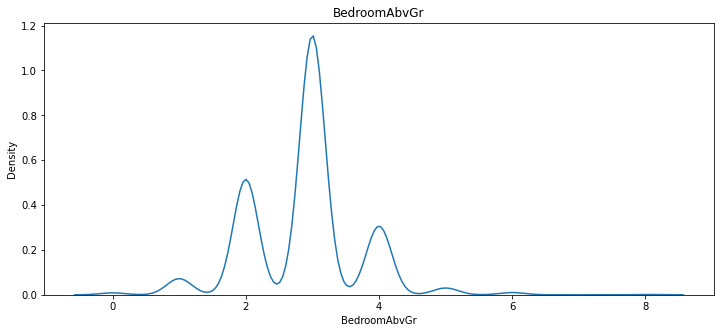

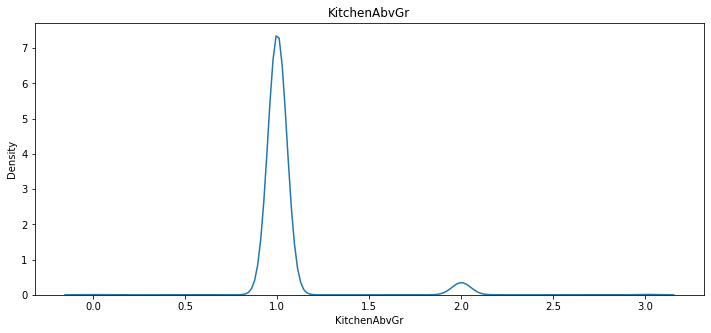

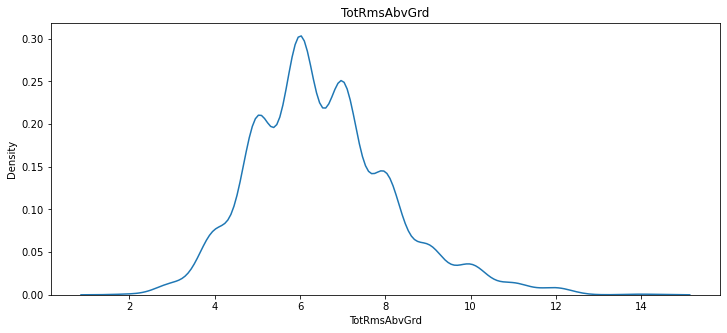

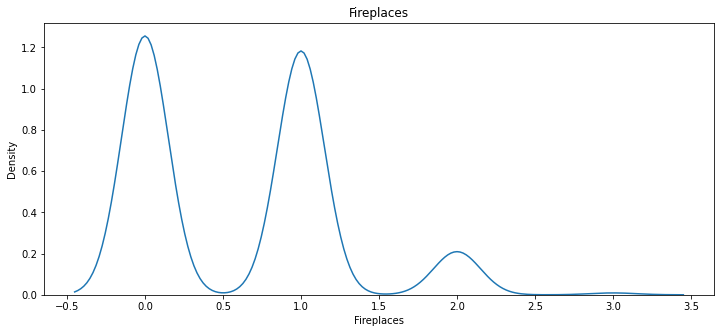

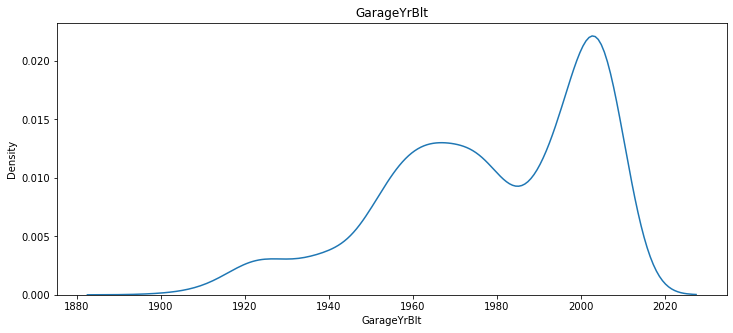

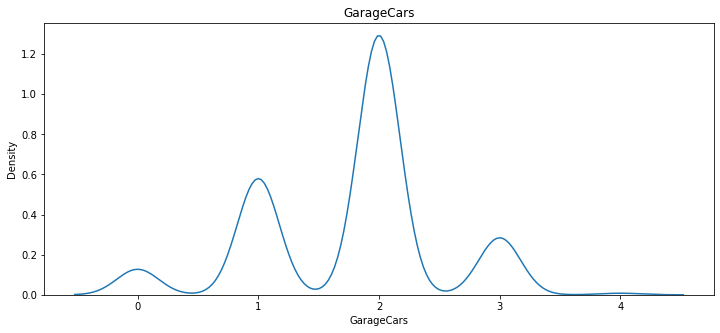

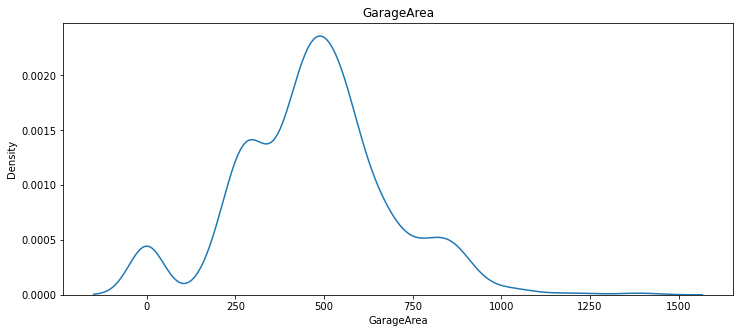

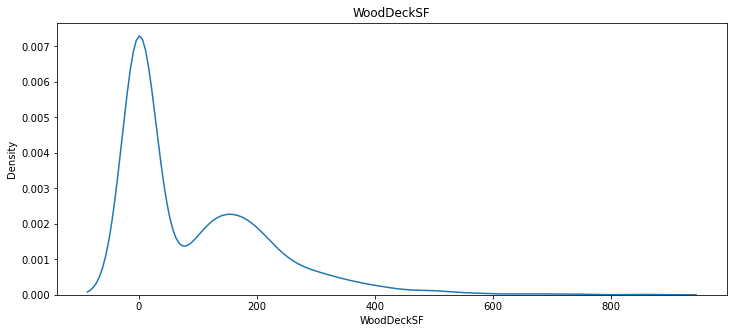

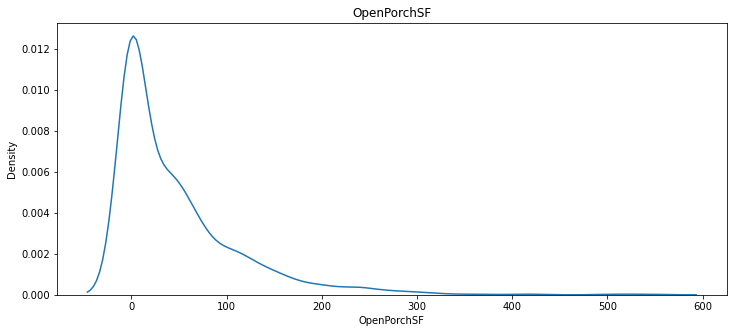

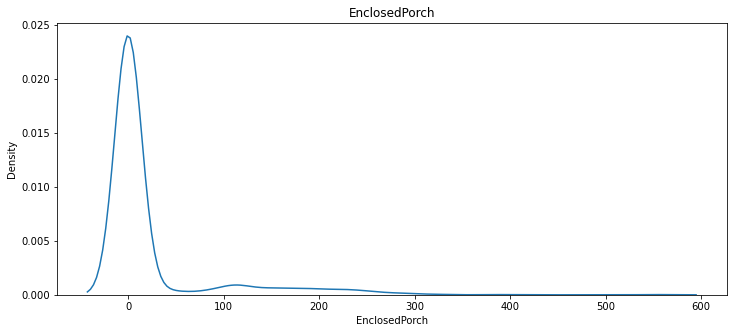

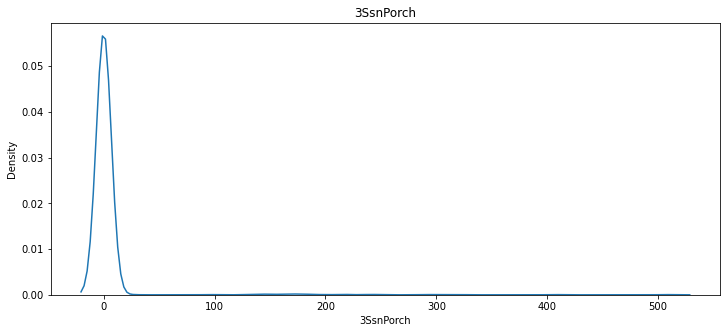

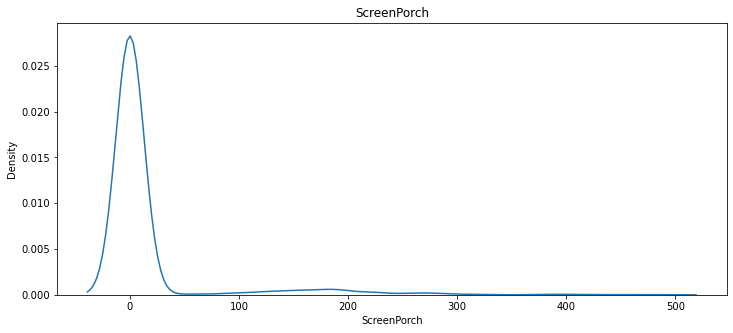

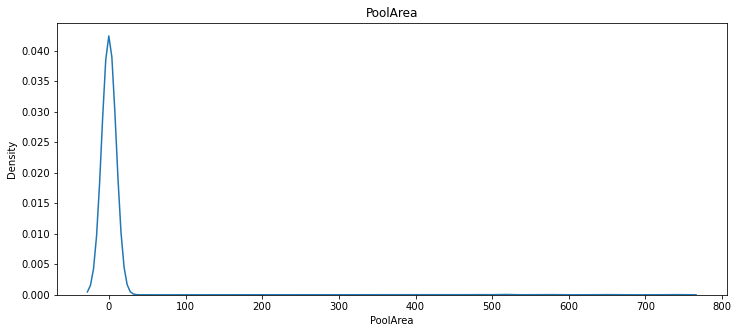

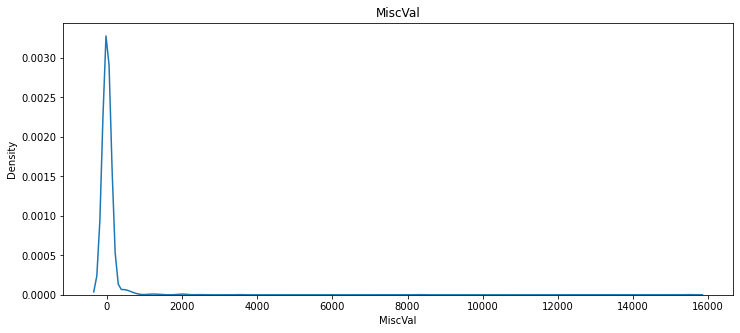

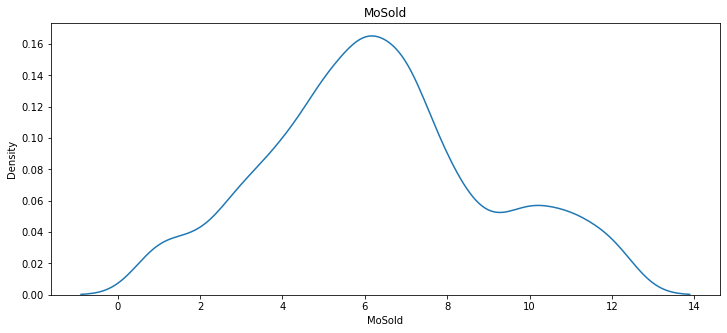

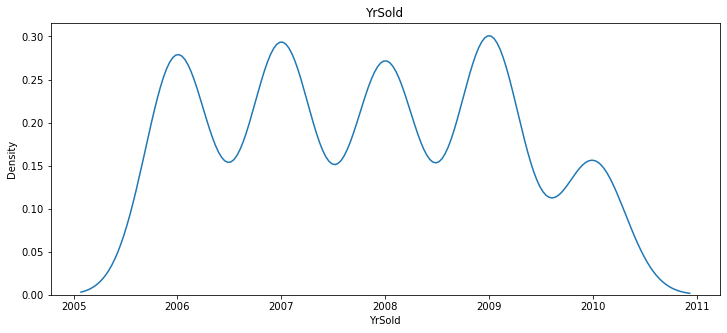

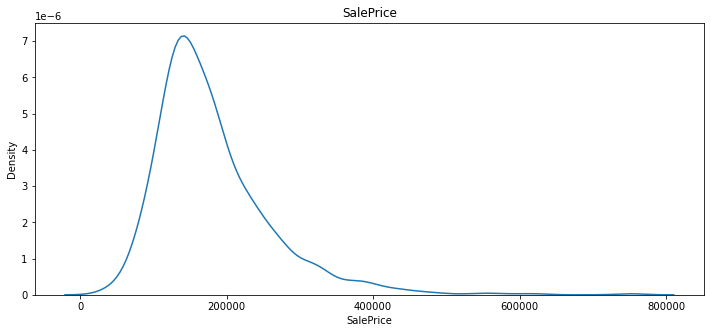

In [12]:
#numerical
for i in numerical.columns:
    plt.figure(figsize=(12,5))
    plt.title(i)
    sns.kdeplot(data=numerical[i])

Comments from the distribution plots:
- "Id" variable is not helpful
- There are garages built more than 100 years ago!
- Many Variables with outliers 


In [13]:
# Skewness
skewness = round(houses_train.skew(),2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"}) 

def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Highly Skewed'
    elif (x['value']<=0 and x['value']>=-0.5) or (x['value'] >=0 and x['value']<=0.5):
        return 'Symmetric distribution'
    else: return 'Moderately skewed'
    
skewness['skewness'] = skewness.apply(f, axis=1)

skewness

C:\Users\rodrigsa\AppData\Local\Temp\ipykernel_30148\4276609091.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = round(houses_train.skew(),2)


,value,skewness
Id,0.00,Symmetric distribution
MSSubClass,1.41,Highly Skewed
LotFrontage,2.16,Highly Skewed
LotArea,12.21,Highly Skewed
OverallQual,0.22,Symmetric distribution
OverallCond,0.69,Moderately skewed
YearBuilt,-0.61,Moderately skewed
YearRemodAdd,-0.50,Symmetric distribution
MasVnrArea,2.67,Highly Skewed
BsmtFinSF1,1.69,Highly Skewed


Observations: 
- There are skewed variables that might need some transformation or removal
- This dataset is a mix between categorical and numerical variables

In [14]:
#Determine outliers
def IQR (df,n,features):
    outlier_list = []
    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        outlier_list.extend(outlier_list_column)
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n)
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0]) 
    return multiple_outliers
Outliers_IQR = IQR(houses_train,1,numerical.columns)

Total number of deleted outliers is: 61


In [15]:
houses_train = houses_train.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

C:\Users\rodrigsa\AppData\Local\Temp\ipykernel_30148\3205185748.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))


<AxesSubplot:>

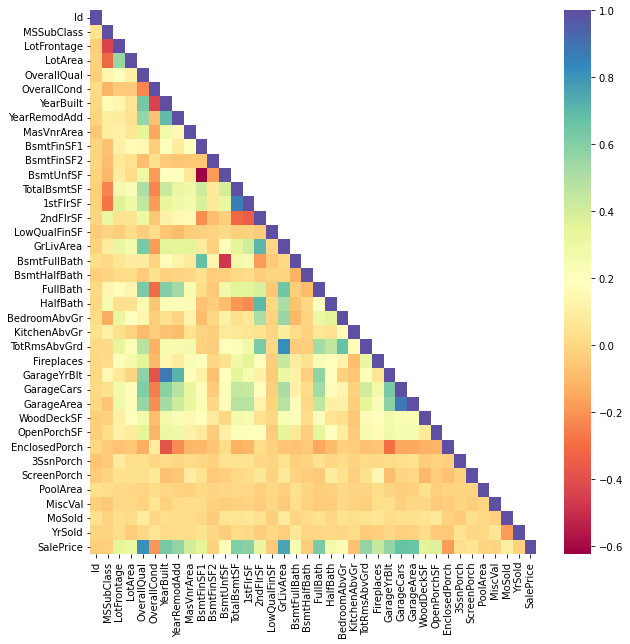

In [16]:
#correlations
fig, ax = plt.subplots(figsize=(10,10))  
corr_df =  houses_train.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap="Spectral", ax=ax)

In [17]:
#highly correlated variables with target
c = houses_train.corrwith(houses_train.SalePrice)
c.loc[lambda x : (x < -0.6) | (x > 0.6)]

OverallQual    0.812701
YearBuilt      0.627424
TotalBsmtSF    0.612431
GrLivArea      0.752717
FullBath       0.627340
GarageCars     0.675247
GarageArea     0.658012
SalePrice      1.000000
dtype: float64

Target Variable seems to be highly correlated with the following variables:
- OverallQual: Quality of the house is the highest correlated feature
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF



In [18]:
#low correlated variables with target
houses_train.corr()['SalePrice'].sort_values(ascending=True)[0:10] 

OverallCond     -0.198224
EnclosedPorch   -0.173862
KitchenAbvGr    -0.066452
LowQualFinSF    -0.040937
Id              -0.029905
BsmtHalfBath    -0.028648
MSSubClass      -0.021921
BsmtFinSF2      -0.017831
YrSold          -0.016015
MiscVal         -0.013553
Name: SalePrice, dtype: float64

Target Variable seems to be low correlated with the following variables:
- MiscVal
- YrSold
- BsmtFinSF2
- MSSubClass
- BsmtHalfBath
- LowQualFinSF
- KitchenAbvGr


## Data Cleaning


In [19]:
#remove variables with very high missing values or that are not correlated with target varible
houses_train.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature','Utilities','Street','MiscVal',
                          'YrSold','BsmtFinSF2','MSSubClass','BsmtHalfBath','LowQualFinSF','KitchenAbvGr'], axis=1, inplace=True)

#filling missing values - Categorical variables 
houses_train['Electrical'] = houses_train['Electrical'].fillna(houses_train['Electrical'].mode()[0])
houses_train['FireplaceQu'] = houses_train['FireplaceQu'].fillna(houses_train['FireplaceQu'].mode()[0])
houses_train['BsmtExposure'] = houses_train['FireplaceQu'].fillna(houses_train['BsmtExposure'].mode()[0])
houses_train['GarageYrBlt'] = houses_train['GarageYrBlt'].fillna(0)
houses_train['GarageType'] = houses_train['GarageType'].fillna('NoGarage')
houses_train['GarageFinish'] = houses_train['GarageFinish'].fillna('NoGarage')
houses_train['GarageQual'] = houses_train['GarageQual'].fillna('NoGarage')
houses_train['GarageCond'] = houses_train['GarageCond'].fillna('NoGarage')
houses_train['BsmtQual'] = houses_train['BsmtQual'].fillna('NoBsmt')
houses_train['BsmtCond'] = houses_train['BsmtCond'].fillna('NoBsmt')
houses_train['BsmtFinType1'] = houses_train['BsmtFinType1'].fillna('NoBsmt')
houses_train['BsmtFinType2'] = houses_train['BsmtFinType2'].fillna('NoBsmt')
houses_train['MasVnrType'] = houses_train['MasVnrType'].fillna('NoMasVnrType')

#filling missing values - numerical variables
houses_train['MasVnrArea'] = houses_train['MasVnrArea'].fillna(0)
houses_train['LotFrontage'] = houses_train['LotFrontage'].fillna(0)

#fix the incorrect data types
houses_train['MoSold'] = houses_train['MoSold'].astype(str)


In [20]:
#there are no missing values now
missing = pd.DataFrame(houses_train.isnull().sum(), columns=['Missing'])
missing['percentage']=missing.div(houses_train.shape[0])*100
missing[missing['Missing']>0]

,Missing,percentage


In [21]:
#I was using one hot encoding but it seems that Label encoder works better for this case 
from category_encoders.one_hot import OneHotEncoder
from sklearn import preprocessing
numerical = houses_train.select_dtypes(include=['int64', 'float64'])
categorical = houses_train.select_dtypes(exclude=['int64', 'float64'])
encoder =preprocessing.LabelEncoder()

cols = categorical.columns

data_encoded=houses_train.copy()
for var in cols:
    data_encoded[var]=encoder.fit_transform(houses_train[var])
    


In [22]:
#separate X and Y
X = data_encoded.iloc[:, :-1].values ## independent variables
y = data_encoded.iloc[:, -1].values  ## dependent variables

In [23]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
#Cross validation configuration
scoring = 'neg_mean_squared_error' 
kfold = KFold(n_splits=5, random_state=7, shuffle=True)

**Model 1: Linear Regression**

In [25]:
lm=LinearRegression()

#Hacer el cross validation y probar con el train
r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_lr)
print("MAE Train", mae_lr)
print("MSE Train", mse_lr)

R2 train 0.896575341645516
MAE Train 15212.776942123804
MSE Train 435978011.81340677


In [26]:
#Performance en el test
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mae_lr=mean_absolute_error(y_test,y_pred)
mse_lr=mean_squared_error(y_test,y_pred)
r2_lr=r2_score(y_test,y_pred)

results_lr = pd.DataFrame([['Linear regression', mae_lr,mse_lr,r2_lr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_lr

,Model,MAE,MSE,R2
0,Linear regression,15029.146159,4.585137e+08,0.87632


**Model 2: Linear Regression + Ridge Regularization**

In [27]:
from sklearn.linear_model import RidgeCV

model = RidgeCV(alphas=np.arange(0.01,5,0.01), cv=kfold, scoring='r2') 

model.fit(X_train, y_train)

print('alfa: %f' % model.alpha_)

alfa: 4.990000


In [28]:
#Creo el modelo con el alpha óptima
model_ridge_new=Ridge(model.alpha_)
#Entrenar el nuevo modelo con la alpha óptima
model_ridge_new.fit(X_train, y_train)

#Performance en el test
y_pred = model.predict(X_test)

mae_ridge=mean_absolute_error(y_test,y_pred)
mse_ridge=mean_squared_error(y_test,y_pred)
r2_ridge=r2_score(y_test,y_pred)

results_ridge = pd.DataFrame([['Linear regression Ridge', mae_ridge,mse_ridge,r2_ridge]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_ridge

,Model,MAE,MSE,R2
0,Linear regression Ridge,14986.33461,4.564281e+08,0.876882


**Model 3: Random Forest**

In [29]:
from sklearn.ensemble import RandomForestRegressor

#Inicializo modelo
#model = RandomForestRegressor(min_samples_leaf=2,
#                               bootstrap=True,
#                               oob_score=False,
#                               random_state=0,
#                               verbose=0)

#Grid search para optimizar hiperparámetros
#gs = GridSearchCV(model,
#                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
#                                'min_samples_split': range(10, 60, 10), #mínimo numero de observaciones
#                                'n_estimators': [100, 300, 500, 800] #número de árboles
#                                }, 
#                  cv=kfold,
#                  scoring='neg_mean_squared_error',
#                  verbose=0)

#Entreno el modelo
#gs.fit(X_train, y_train)

In [30]:
#print(gs.best_params_)

In [31]:
#crear nuevo modelo usando los parámetros óptimos que obtuvimos
new_model_RF = RandomForestRegressor(n_estimators=300,#número de árboles
                               criterion='squared_error',
                               max_depth=10,
                               min_samples_split=10,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

R2 train 0.8762091249434398
MAE Train 15898.108291223733
MSE Train 517691806.5511953


In [32]:
#Performance en el test
y_pred = new_model_RF.predict(X_test)

mae_rf=mean_absolute_error(y_test,y_pred)
mse_rf=mean_squared_error(y_test,y_pred)
r2_rf=r2_score(y_test,y_pred)

results_rf = pd.DataFrame([['Random Forest', mae_rf,mse_rf,r2_rf]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rf

,Model,MAE,MSE,R2
0,Random Forest,15151.692885,4.877974e+08,0.868421


**Model Comparison**

In [33]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF'], 'MSE': [mse_lr, mse_ridge, mse_rf],
                    'MAE':[mae_lr, mae_ridge, mae_rf],
                    'R2':[r2_lr, r2_ridge, r2_rf]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,MSE,MAE,R2
0,LR,4.585137e+08,15029.146159,0.876320
1,Ridge,4.564281e+08,14986.334610,0.876882
2,RF,4.877974e+08,15151.692885,0.868421


From these 3 models, the best one is Linear regression + Ridge regularization

**New Predictions**

In [35]:
X_new = houses_test

ynew = model_ridge_new.predict(X_new)